Sistema de inferencia de Takagi-Sugeno y ANFIS
===

* 30 min | Última modificación: Junio 11, 2021 | [YouTube]

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fuzzy_toolbox.sugeno import Sugeno
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

In [2]:
def plot_memberships(m):
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 3, 1)
    m.plot_fuzzysets(0)
    plt.subplot(1, 3, 2)
    m.plot_fuzzysets(1)
    plt.subplot(1, 3, 3)
    m.plot_fuzzysets(2)

In [3]:
!pip install --quiet --upgrade fuzzy_toolbox

## Modelos de Takagi-Sugeno y ANFIS

En los sistemas de Mamdani, las reglas tienen conjuntos difusos en sus consecuentes. Por ejemplo:

**IF** $x$ **IS** $A_i$ **AND** $y$ **IS**  $B_j$ **AND** $u$ **IS** $C_k$, **THEN** $z$  **IS** $D_n$

En los sistemas de Takagi-Sugeno (TS) y ANFIS, el consecuente es una función. Por ejemplo:

**IF** $x$ **IS** $A_i$ **AND** $y$ **IS**  $B_j$ **AND** $u$ **IS** $C_k$, **THEN** $z=w_0 + w_1 x + w_2 y + w_3 u$ 


El valor de la composición de los antecedentes de cada regla ($w_r$) se puede calcular usando min o product, al igual que en los sistemas Mamdani. Si $z_r$ representa la salida obtenida al evaluar la regla $r$, la salida del sistema puede calcularse como:

$$
Z = \frac{\sum_r w_r r_r}{\sum_r w_r}
$$

## Modelo de Takagi-Sugeno

Este tipo de modelo se caracteriza por usar:

* Las funciones de pertenencia triangular o gaussiana para los conjuntos borrosos.

* El operador "min" para el cómputo del operador AND en los antecedentes de las reglas.

## Modelo ANFIS (Adaptive Neuro Fuzzy Inference System)

Se caracteriza por:

* Usar la función de campana generalizada:

$$
\mu(x) =
\frac{1}{1 + \left[ \frac{x-c}{\sigma} \right]^{2b} }
$$

* Usar la función "prod" para el cómputo del operador AND en los antecedentes de las reglas.

## Ejemplo numérico

In [4]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/concrete.csv",
    sep=",",
    thousands=None,
    decimal=".",
)

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
y = df_norm.pop("strength")

X_consequences = df_norm.copy()
X_premises = X_consequences[["cement", "slag", "ash"]]

## Modelo de Takagi-Sugeno con funciones de pertenencia triangulares

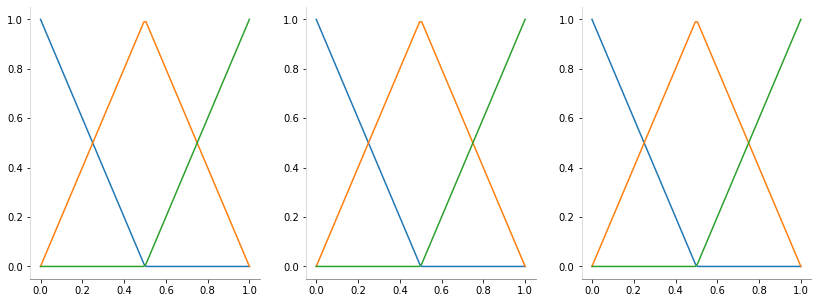

In [5]:
from fuzzy_toolbox.sugeno import Sugeno

model_trimf = Sugeno(
    num_input_mfs=(3, 3, 3),
    and_operator="prod",
    mftype="trimf",
    seed=123456,
)

#
# Conjuntos borrosos iniciales
#
history = model_trimf.fit(
    X_premises.values,
    X_consequences.values,
    y.values,
    max_iter=0,
)


    
plot_memberships(model_trimf)

100% (500 of 500) |######################| Elapsed Time: 0:09:11 Time:  0:09:11


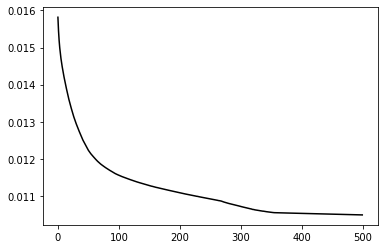

In [6]:
#
# Entrenamiento del modelo
#
history = model_trimf.fit(
    X_premises.values,
    X_consequences.values,
    y.values,
    max_iter=500,
    learning_rate="adaptive",
    learning_rate_init=10.0,
    power_t=0.5,
    batch_size=None,
    shuffle=True,
)
plt.plot(history["loss"], "-k")
plt.show()

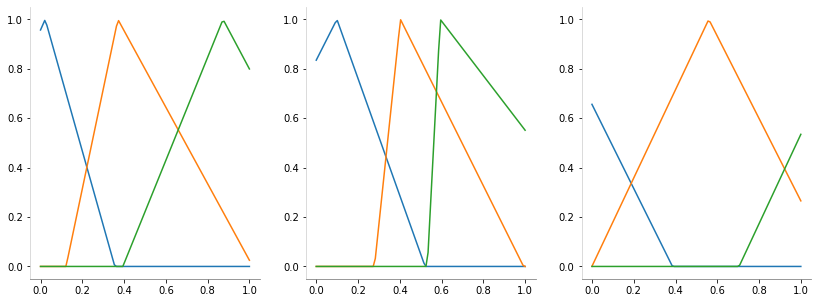

In [7]:
plot_memberships(model_trimf)

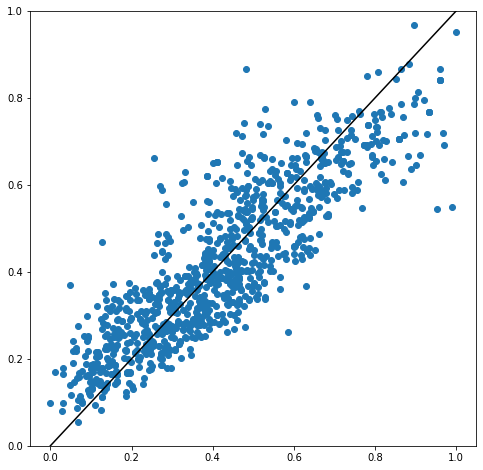

0.0105

In [8]:
#
# Pronóstico vs Real
#
y_pred = model_trimf(X_premises.values, X_consequences.values)
plt.figure(figsize=(8, 8))
plt.scatter(y.values, y_pred)
plt.plot([0, 1], [0, 1], color="black")
plt.ylim(0, 1)
plt.show()
round(np.mean((y.values - y_pred)**2),4)

## Modelo de Takagi-Sugeno con funciones de pertenencia gaussianas

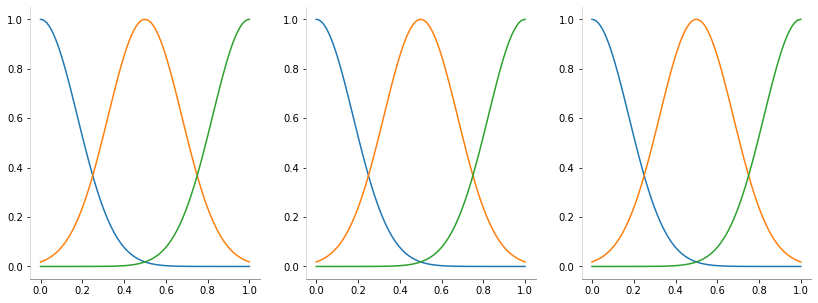

In [9]:
model_gaussmf = Sugeno(
    num_input_mfs=(3, 3, 3),
    and_operator="prod",
    mftype="gaussmf",
    seed=123456,
)

#
# Conjuntos borrosos iniciales
#
history = model_gaussmf.fit(
    X_premises.values,
    X_consequences.values,
    y.values,
    max_iter=0,
)

plot_memberships(model_gaussmf)

100% (50 of 50) |########################| Elapsed Time: 0:01:24 Time:  0:01:24


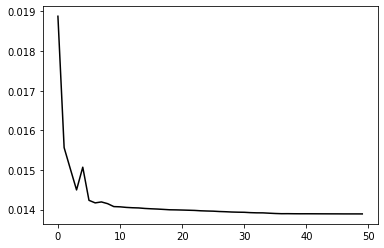

In [10]:
#
# Entrenamiento del modelo
#
history = model_gaussmf.fit(
    X_premises.values,
    X_consequences.values,
    y.values,
    max_iter=50,
    learning_rate="adaptive",
    learning_rate_init=10,
    power_t=0.5,
    batch_size="auto",
    shuffle=True,
)
plt.plot(history["loss"], "-k")
plt.show()

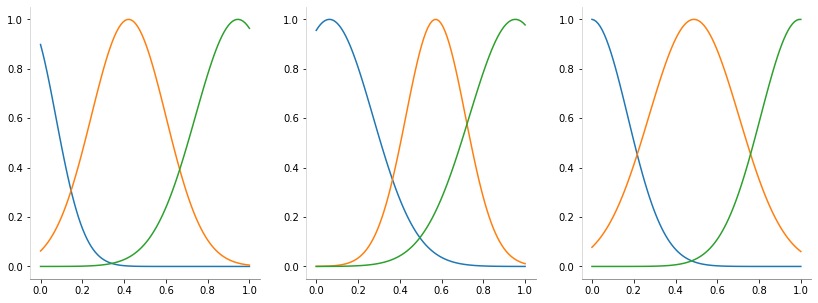

In [11]:
plot_memberships(model_gaussmf)

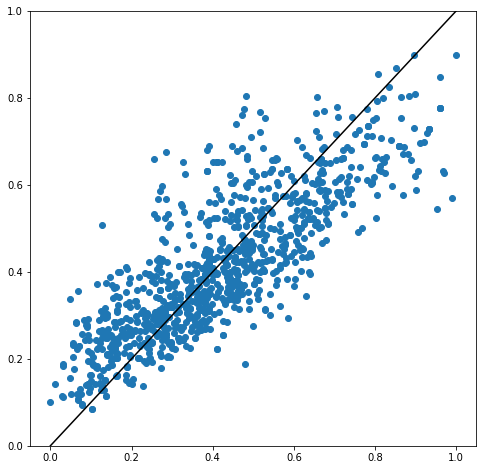

0.0139

In [12]:
#
# Pronóstico vs Real
#
y_pred = model_gaussmf(X_premises.values, X_consequences.values)
plt.figure(figsize=(8, 8))
plt.scatter(y.values, y_pred)
plt.plot([0, 1], [0, 1], color="black")
plt.ylim(0, 1)
plt.show()
round(np.mean((y.values - y_pred)**2),4)

## ANFIS

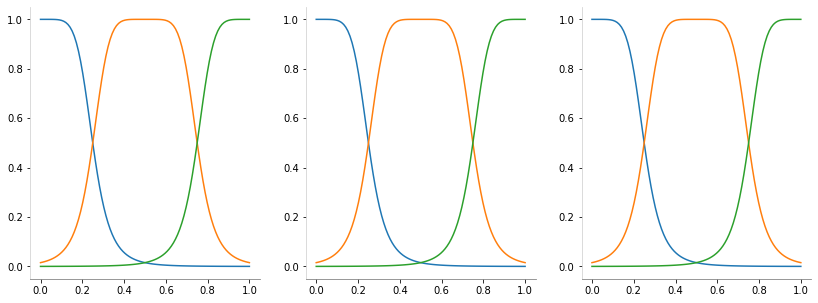

In [13]:
anfis = Sugeno(
    num_input_mfs=(3, 3, 3),
    and_operator="prod",
    mftype="gbellmf",
    seed=123456,
)

#
# Conjuntos borrosos iniciales
#
history = anfis.fit(
    X_premises.values,
    X_consequences.values,
    y.values,
    max_iter=0,
)

plot_memberships(anfis)

100% (50 of 50) |########################| Elapsed Time: 0:02:55 Time:  0:02:55


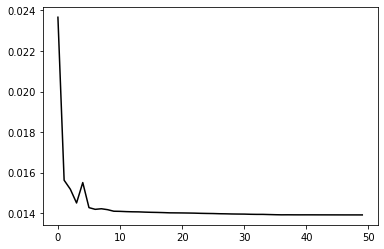

In [14]:
#
# Entrenamiento del modelo
#
history = anfis.fit(
    X_premises.values,
    X_consequences.values,
    y.values,
    max_iter=50,
    learning_rate="adaptive",
    learning_rate_init=10,
    power_t=0.5,
    batch_size="auto",
    shuffle=True,
)
plt.plot(history["loss"], "-k")
plt.show()

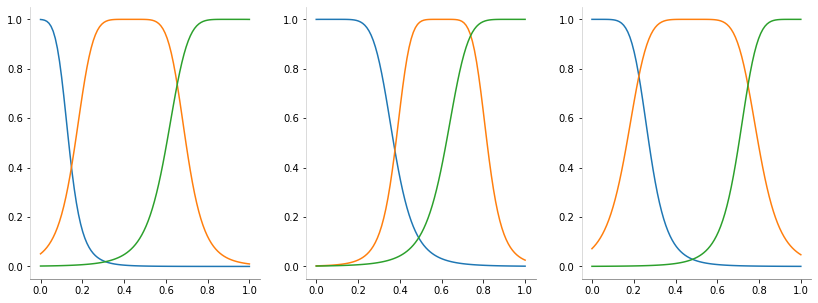

In [15]:
plot_memberships(anfis)

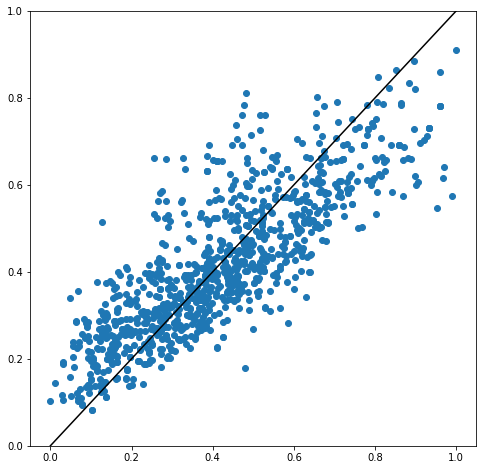

0.0139

In [16]:
#
# Pronóstico vs Real
#
y_pred = anfis(X_premises.values, X_consequences.values)
plt.figure(figsize=(8, 8))
plt.scatter(y.values, y_pred)
plt.plot([0, 1], [0, 1], color="black")
plt.ylim(0, 1)
plt.show()
round(np.mean((y.values - y_pred)**2),4)